In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import keras
from keras.layers import BatchNormalization, Conv2D, SeparableConv2D, Activation, Dropout, MaxPool2D, Add, Dense
from keras.applications import Xception
import tensorflow as tf

In [0]:
inp = keras.Input(shape=(224, 224, 3))
m = (Conv2D(64, (3, 3), padding='same', activation='relu'))(inp)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
mod = (Conv2D(128, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(128, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(256, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(256, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(784, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(784, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(784, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(784, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(1024, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(1024, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(1024, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(1024, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(784, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(784, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(512, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(512, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(256, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(256, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])

m = (SeparableConv2D(128, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (SeparableConv2D(128, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (Dropout(0.2))(m)
m = (keras.layers.GlobalMaxPooling2D())(m)
m = (Dense(1, activation='sigmoid'))(m)
model = keras.Model(inp, m)

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import pandas as pd


from keras.preprocessing.image import ImageDataGenerator

In [0]:
data = pd.read_csv("/content/drive/My Drive/AugmentedDIC/Glaucoma.csv")
glaucoma = np.array(data)

In [0]:
x = []
y = []

choicelist = list(range(0, len(glaucoma)))

for i in range(len(glaucoma)):
  ind = np.random.choice(choicelist)
  filename = str(glaucoma[ind][0])

  if "D" in filename:
    path = "/content/drive/My Drive/AugmentedDIC/Dhristi"

    if "G" in filename:
      filepath = os.path.join(path, "Glaucoma")
    else:
      filepath = os.path.join(path, "Normal")

  else:
    path = "/content/drive/My Drive/AugmentedDIC/RIM-ONE"

    if "G" in filename:
      filepath = os.path.join(path, "Glaucoma")
    else:
      filepath = os.path.join(path, "Normal")
    
  img = np.array(Image.open(os.path.join(filepath, filename)).resize((224, 224), Image.ANTIALIAS)).reshape(224, 224, 3)
  img = img/255.0
  
  x.append(img)
  y.append(glaucoma[ind][1])

In [0]:
x = np.array(x)
y = np.array(y)

In [0]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=1)

x_t, x_v, y_t, y_v = train_test_split(x_tr, y_tr, test_size=0.2, random_state=1)

In [0]:
from keras.optimizers import Adadelta
from keras.utils import to_categorical

In [0]:
model.compile(loss= 'binary_crossentropy', optimizer=Adadelta(lr=0.01), metrics=['accuracy'])

In [0]:
imgen = ImageDataGenerator(vertical_flip=True, horizontal_flip=True, rotation_range=20)
imgen.fit(x_t)

In [0]:
history = model.fit_generator(imgen.flow(x_t, y_t, batch_size=16), epochs=35, steps_per_epoch=len(x_t)//16, validation_data=(x_v, y_v), validation_steps=len(x_v)//16, shuffle=True)

Epoch 1/35
32/32 [==============================] - 26s 801ms/step - loss: 0.6644 - acc: 0.5859 - val_loss: 0.5355 - val_acc: 0.8062
Epoch 2/35
32/32 [==============================] - 15s 483ms/step - loss: 0.5583 - acc: 0.7455 - val_loss: 0.4903 - val_acc: 0.8450
Epoch 3/35
32/32 [==============================] - 16s 487ms/step - loss: 0.5061 - acc: 0.7889 - val_loss: 0.4698 - val_acc: 0.8372
Epoch 4/35
32/32 [==============================] - 16s 488ms/step - loss: 0.4666 - acc: 0.8139 - val_loss: 0.4525 - val_acc: 0.8217
Epoch 5/35
32/32 [==============================] - 15s 481ms/step - loss: 0.4655 - acc: 0.7920 - val_loss: 0.4243 - val_acc: 0.8450
Epoch 6/35
32/32 [==============================] - 15s 478ms/step - loss: 0.4321 - acc: 0.8374 - val_loss: 0.3987 - val_acc: 0.8760
Epoch 7/35
32/32 [==============================] - 15s 479ms/step - loss: 0.3960 - acc: 0.8593 - val_loss: 0.3727 - val_acc: 0.9070
Epoch 8/35
32/32 [==============================] - 15s 481ms/step - 

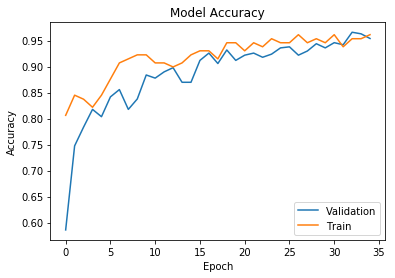

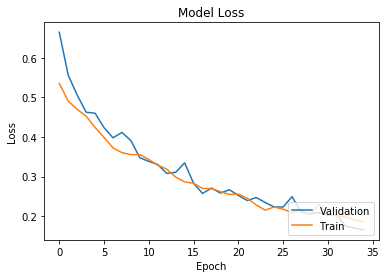

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Validation', 'Train'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Validation', 'Train'], loc='lower right')
plt.show()


In [0]:
loss, acc = model.evaluate(x_te, y_te)

161/161 [==============================] - 1s 7ms/step


In [0]:
print(loss, acc)

0.21730496986589817 0.937888198757764


In [0]:
# model.save('/content/drive/My Drive/Custom_Arch(97, 1).h5')

161/161 [==============================] - 3s 16ms/step
[[79  5]
 [ 5 72]]


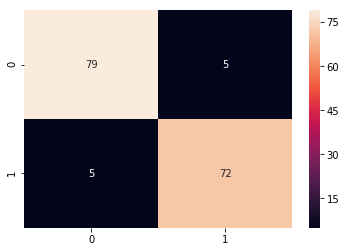

In [0]:
pred= np.round(model.predict(x_te, verbose=1, batch_size=16))
from sklearn.metrics import confusion_matrix
conf_matrix= confusion_matrix(y_te, pred)
import seaborn as sb
print (conf_matrix)
sb.heatmap(conf_matrix, annot=True, fmt='.5g')